In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
#data frame
df = pd.read_csv(url, names=names)


In [ ]:
print(df.describe())

                 id  clump_thickness  ...     mitoses       class
count  6.990000e+02       699.000000  ...  699.000000  699.000000
mean   1.071704e+06         4.417740  ...    1.589413    2.689557
std    6.170957e+05         2.815741  ...    1.715078    0.951273
min    6.163400e+04         1.000000  ...    1.000000    2.000000
25%    8.706885e+05         2.000000  ...    1.000000    2.000000
50%    1.171710e+06         4.000000  ...    1.000000    2.000000
75%    1.238298e+06         6.000000  ...    1.000000    4.000000
max    1.345435e+07        10.000000  ...   10.000000    4.000000

[8 rows x 10 columns]


In [ ]:
df.head(7) #forfirst7rows

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [ ]:
# for haw many rows and column
df.shape

(699, 11)

In [ ]:
# check empty column
df.isna().sum()

id                             0
clump_thickness                0
uniform_cell_size              0
uniform_cell_shape             0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [ ]:
df.replace('?',-9999,inplace=True)
print(df.axes)
#class= 4=>malignant(cancerous) ,2=>benign

#drop 'id' column because it does not contributes to dataset and may result in overfitting
df.drop(['id'],1,inplace=True)

#shape of dataset
print(df.shape)


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [ ]:
#chech how many class 2 and class 4
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


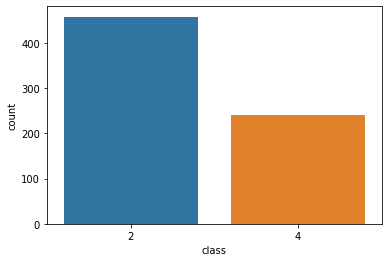

In [ ]:
#visualising the data
sns.countplot(df['class'] , label='count')

In [ ]:
df.dtypes  #to chech which datatypes

clump_thickness                 int64
uniform_cell_size               int64
uniform_cell_shape              int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

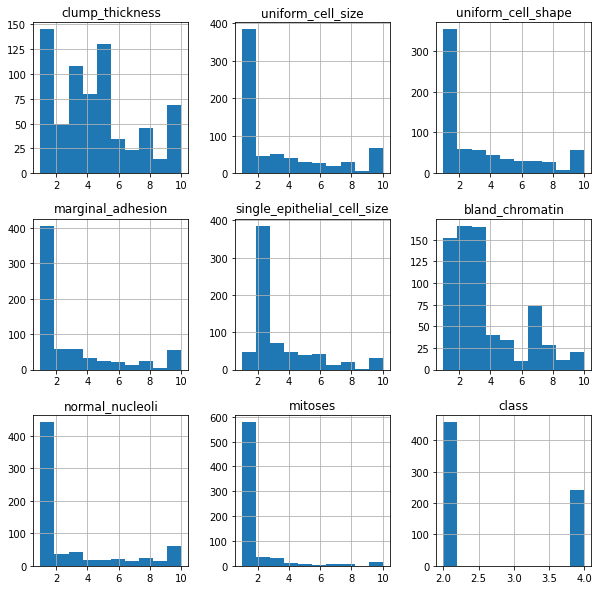

In [ ]:
#create a pair plot or scatter matric of both classes to understand more
df.hist(figsize=(10,10))
plt.show()

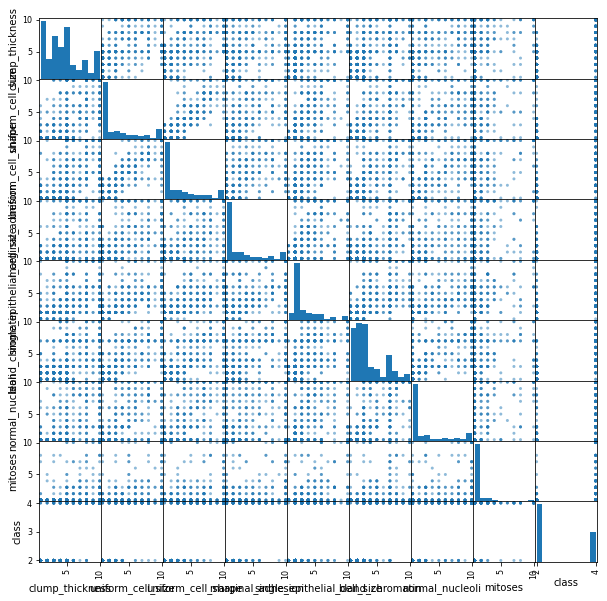

In [ ]:
#tells whether linear classifier will work good for the dataset or not
#and to know realtionship between features
scatter_matrix(df,figsize=(10,10))
plt.show()

In [ ]:
df.iloc[:,1:12].corr()   #how much related are with each othrr

,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
uniform_cell_size,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


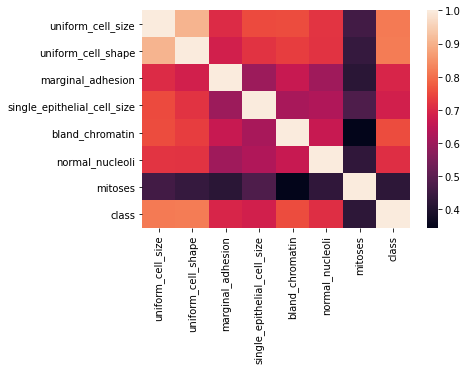

In [ ]:
sns.heatmap(df.iloc[:,1:12].corr())     #visualising

In [ ]:
#SPLITTING IN INDEPENDENT X AND y
X = df.iloc[:,2:12].values
Y =df.iloc[:,1].values

In [ ]:
#splittung the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25 , random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [ ]:
#creating function
def models(X_train,Y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log =LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)
  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy' , random_state =0)
  tree.fit(X_train,Y_train)

  print("logistic regression",log.score(X_train,Y_train))
  print("Decision tree",tree.score(X_train,Y_train))
  return log,tree
  models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))# odd value to avoid ties 
  models.append(('SVM',SVC()))

  results = []
  names = []
  for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed) #run 10 times and select the best results
    cv_results =model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring) #fitting a model and computing the score
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg) #accuracy only on training data
print(results)

[array([1.        , 1.        , 0.96428571, 1.        , 0.91071429,
       0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.98181818]), array([0.67857143, 0.67857143, 0.5       , 0.73214286, 0.64285714,
       0.73214286, 0.64285714, 0.73214286, 0.66071429, 0.63636364])]


In [ ]:
model= models(X_train,Y_train)

ValueError: ignored

In [ ]:
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.6214285714285714
              precision    recall  f1-score   support

           2       0.62      1.00      0.77        87
           4       0.00      0.00      0.00        53

    accuracy                           0.62       140
   macro avg       0.31      0.50      0.38       140
weighted avg       0.39      0.62      0.48       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#create X and Y datasets for training 
print(df.loc[0])
X = np.array(df.drop(['class'],1))
print(X[0])
y = np.array(df['class'])
print(y[0])
print(X.shape,y.shape)
# No_of_rows X no_of_columns
#(no_of_rows,) => n X 1 vector or n-dim vector
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2) #a random split into training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clump_thickness                5
uniform_cell_size              1
uniform_cell_shape             1
marginal_adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitoses                        1
class                          2
Name: 0, dtype: object
[5 1 1 1 2 '1' 3 1 1]
2
(699, 9) (699,)
(559, 9) (559,)
(140, 9) (140,)


In [ ]:
#specify testing parameters
seed = 8 #not a random seed for reproducable results
scoring = 'accuracy'

In [ ]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))# odd value to avoid ties 
models.append(('SVM',SVC()))

#Evaluate each model
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed) #run 10 times and select the best results
    cv_results =model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring) #fitting a model and computing the score
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg) #accuracy only on training data
print(results)

KNN: 0.971396 (0.025492)
SVM: 0.663636 (0.065512)
[array([1.        , 1.        , 0.96428571, 1.        , 0.91071429,
       0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.98181818]), array([0.67857143, 0.67857143, 0.5       , 0.73214286, 0.64285714,
       0.73214286, 0.64285714, 0.73214286, 0.66071429, 0.63636364])]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
#Make predictions on validation dataset

for name,model in models:
    model.fit(X_train,y_train) #training the model
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        87
           4       0.98      0.94      0.96        53

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.6214285714285714
              precision    recall  f1-score   support

           2       0.62      1.00      0.77        87
           4       0.00      0.00      0.00        53

    accuracy                           0.62       140
   macro avg       0.31      0.50      0.38       140
weighted avg       0.39      0.62      0.48       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf =KNeighborsClassifier()

clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,5]])
# print(example.shape)
# print(example)
# example=example.reshape(len(example),-1) #row to column vector
# print(example.shape)
# print(example)

prediction=clf.predict(example)
print(prediction)

0.9714285714285714
[2]


In [ ]:
models

[('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [ ]:
X_test

array([[1, 1, 1, ..., 2, 1, 1],
       [10, 4, 4, ..., 2, 3, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [6, 10, 5, ..., 6, 10, 1],
       [1, 1, 1, ..., 3, 1, 1],
       [2, 1, 1, ..., 1, 1, 1]], dtype=object)